# SVM (Support Vector Machines)

### Carlos Sepúlveda

En general para cualquier clasificador regresor tenemos la siguiente estructura de trabajo:

1. Importar el dataset
2. Explorar los datos y tratar de ver como lucen
3. Dividir los datos entre atributos y etiquetas (variables explicativas y explicadas)
4. Dividir el conjutno de datos en entrenamiento (train)  y prueba (test). A veces el conjunto de entrenaiento lo subvididimos en entrenamiento y validación para jauste de hiper parámetros.
5. Pre-procesar los datos
6. Entrenar el clasificador/regresor (inlcuye el ajuste de hiper parámetros)
7. Evaluar el resultado del modelo con el conjunto de test, objeto medir su capacidad de generalización.


## Ejemplos básicos con SVM

In [18]:
# importar librerías
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs


<function matplotlib.pyplot.show(*args, **kw)>

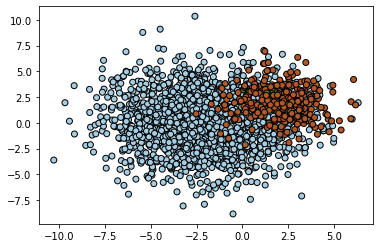

In [19]:
# Importar datos. Para estos efectos crearemos un dataset ficticio
# generamos dos cluster de puntos aleatorios
n_samples_1 = 2000
n_samples_2 = 300
centers = [[-2.0, 0.0], [2.0, 2.0]]
clusters_std = [2.5, 1.5]

# semilla para repetitibilidad
seed = 20220906
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2]
                  , centers = centers, cluster_std = clusters_std,
                  random_state=seed,
                  shuffle=False)

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.show

In [20]:
import pandas as pd

data_tuples = list(zip(X[:,0], X[:,1],y))
df = pd.DataFrame(data_tuples, columns=['attribute1', 'attribute1', 'class'])
df

,attribute1,attribute1,class
0,-2.082144,0.839470,0
1,-2.145868,2.464358,0
2,0.123672,1.132522,0
3,-1.470020,-2.434669,0
4,-6.224180,-6.930847,0
...,...,...,...
2295,2.595326,1.727193,1
2296,1.536812,1.738903,1
2297,2.180829,1.910971,1
2298,5.299647,0.190822,1


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# Shuffle =True por defecto
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [23]:
parameters = {'kernel':('linear', 'rbf'),'C':range(1,10)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': range(1, 10), 'kernel': ('linear', 'rbf')})

In [24]:
clf.cv_results_

{'mean_fit_time': array([0.01461978, 0.02170758, 0.01009688, 0.02248459, 0.00992231,
        0.02498345, 0.00991702, 0.02802515, 0.00993462, 0.02494645,
        0.01010232, 0.026964  , 0.01016707, 0.0265872 , 0.01035337,
        0.02645555, 0.01180587, 0.0281239 ]),
 'std_fit_time': array([0.00526521, 0.00099702, 0.00033152, 0.00060696, 0.00017604,
        0.00207789, 0.00017486, 0.00346542, 0.0001787 , 0.00094253,
        0.00060075, 0.00206142, 0.00037554, 0.00074667, 0.00027766,
        0.00068301, 0.00208199, 0.00196666]),
 'mean_score_time': array([0.00310855, 0.00593152, 0.00253925, 0.00580387, 0.00242519,
        0.00582752, 0.002456  , 0.00588131, 0.00241599, 0.00582199,
        0.00237417, 0.00582657, 0.00244217, 0.00582657, 0.00242186,
        0.00599027, 0.00275607, 0.00575795]),
 'std_score_time': array([7.11841611e-04, 1.43863406e-04, 8.15551307e-05, 7.91306056e-05,
        3.86214550e-05, 1.16985911e-04, 4.97035896e-05, 1.35998522e-04,
        5.48759814e-05, 1.16183641e-

In [25]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [26]:
clf = svm.SVC(C=1, kernel='rbf')
clf.fit(X_train, y_train)


SVC(C=1)

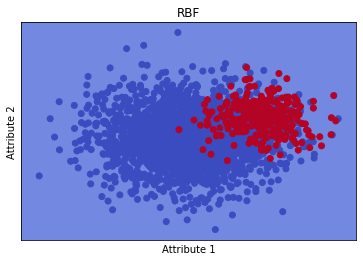

In [30]:
h = .02
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



plt.subplot()
#plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('RBF')

plt.show()


In [33]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaler.transform(X_test))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.97      0.95       608
     class 1       0.70      0.51      0.59        82

    accuracy                           0.92       690
   macro avg       0.82      0.74      0.77       690
weighted avg       0.91      0.92      0.91       690



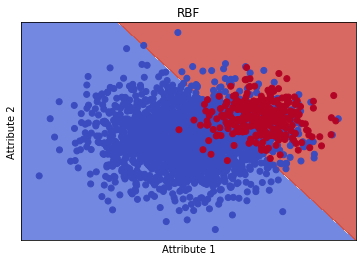

In [34]:
clf2 = svm.SVC(kernel='linear', C=1)
clf2.fit(X_train,y_train)

h = .02
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



plt.subplot()
#plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('RBF')

plt.show()